In [24]:
%matplotlib inline

## 0.4 Train SVM model

In [25]:
cd ../

/Users/anacriel/plant_seed_classification


In [26]:
import numpy as np
import pandas as pd
import os
import string
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import src.features.build_features as bf

In [27]:
cd src/

/Users/anacriel/plant_seed_classification/src


In [28]:
dataset = pd.read_csv("data/features_3_10_19.csv")
dataset.drop(columns=[dataset.columns[0], dataset.columns[4]], inplace=True)
dataset.head()

,label,area,largest_area,perimeter,aspect_ratio,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,skew_r,skew_g,skew_b
0,9,8081.0,4496.5,559.286358,0.578094,38.708233,50.984027,60.557028,32.992428,7.096129,7.143031,7.855711,0.674907,0.227231,0.414289
1,9,9554.5,5435.0,548.499561,0.599365,31.487966,57.672424,67.709697,33.943030,6.194284,7.455211,7.037360,1.012593,-0.286254,0.494366
2,9,7064.0,3129.5,222.409161,0.968750,7.002525,57.910567,67.711947,36.566906,7.441213,7.059173,6.929987,1.284243,-0.022208,0.696010
3,9,8902.0,4440.0,273.279218,1.283295,8.389298,57.762575,67.379269,33.364757,6.449835,5.684232,6.536645,1.327260,0.475411,0.947661
4,9,11930.0,7304.5,348.575682,1.058717,10.184829,54.310651,63.228059,34.808469,7.687266,7.795908,8.403379,0.526196,0.046387,0.041887


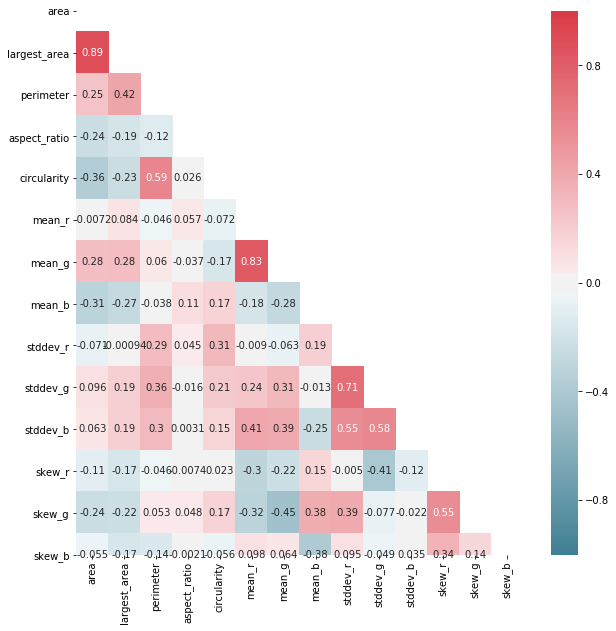

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

X = dataset.iloc[:, 1:]
X.head(15)
corr = X.corr()
fig, ax = plt.subplots(figsize=(10, 10)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, ax=ax, cmap=cmap, annot=True, center=0, vmin=-1, vmax=1)


In [40]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(props=[("font-size", "12pt")]),
            dict(props=[('max-width', '200px'),
                        ('font-size', '12pt')])]
corr = X.corr()
corr.style.background_gradient(cmap=sns.diverging_palette(220, 10, as_cmap=True)) \
            .set_properties(**{'max-width': '50px', 'max-height': '80px', 'font-size': '10pt'})  \
            .set_precision(2) \


,area,largest_area,perimeter,aspect_ratio,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,skew_r,skew_g,skew_b
area,1,0.89,0.25,-0.24,-0.36,-0.0072,0.28,-0.31,-0.071,0.096,0.063,-0.11,-0.24,-0.055
largest_area,0.89,1,0.42,-0.19,-0.23,0.084,0.28,-0.27,-0.00094,0.19,0.19,-0.17,-0.22,-0.17
perimeter,0.25,0.42,1,-0.12,0.59,-0.046,0.06,-0.038,0.29,0.36,0.3,-0.046,0.053,-0.14
aspect_ratio,-0.24,-0.19,-0.12,1,0.026,0.057,-0.037,0.11,0.045,-0.016,0.0031,-0.0074,0.048,-0.0021
circularity,-0.36,-0.23,0.59,0.026,1,-0.072,-0.17,0.17,0.31,0.21,0.15,0.023,0.17,-0.056
mean_r,-0.0072,0.084,-0.046,0.057,-0.072,1,0.83,-0.18,-0.009,0.24,0.41,-0.3,-0.32,0.098
mean_g,0.28,0.28,0.06,-0.037,-0.17,0.83,1,-0.28,-0.063,0.31,0.39,-0.22,-0.45,0.064
mean_b,-0.31,-0.27,-0.038,0.11,0.17,-0.18,-0.28,1,0.19,-0.013,-0.25,0.15,0.38,-0.38
stddev_r,-0.071,-0.00094,0.29,0.045,0.31,-0.009,-0.063,0.19,1,0.71,0.55,-0.005,0.39,0.095
stddev_g,0.096,0.19,0.36,-0.016,0.21,0.24,0.31,-0.013,0.71,1,0.58,-0.41,-0.077,-0.049


In [28]:
y = dataset.iloc[:,0]
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Unnamed: 0, dtype: int64

## Cross validational split

In [342]:
from sklearn.model_selection import train_test_split

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 30) #r state 140

In [344]:
from sklearn import preprocessing

In [345]:
#X_train_std = (X_train - X_train.mean()) / X_train.std()
#X_test_std = (X_test - X_train.mean()) / X_train.std()
scaler = preprocessing.MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [346]:
X_train_std

array([[0.4731836 , 0.24174434, 0.06360981, ..., 0.44580994, 0.25526211,
        0.46077956],
       [0.55540694, 0.54767353, 0.21500128, ..., 0.2705621 , 0.29924035,
        0.32664903],
       [0.09054599, 0.04606426, 0.04152277, ..., 0.30986011, 0.4006289 ,
        0.36234782],
       ...,
       [0.13048728, 0.1292255 , 0.09484561, ..., 0.47024091, 0.4401301 ,
        0.32050908],
       [0.43550874, 0.21722387, 0.05914577, ..., 0.43805775, 0.28718745,
        0.44554364],
       [0.5915213 , 0.59092854, 0.17079267, ..., 0.43969308, 0.44593042,
        0.38774531]])

In [347]:
from sklearn import metrics

## Applying Decision Tree classifier

In [356]:
from sklearn.tree import DecisionTreeClassifier

In [364]:
f_score = 0
for i in range(1, 51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i) 
    scaler = preprocessing.MinMaxScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    clf = DecisionTreeClassifier(max_depth=12)
    clf.fit(X_train_std, y_train)
    
    y_pred = clf.predict(X_test_std)
    f_score += metrics.f1_score(y_test, y_pred, average='micro')
    
f_score / 50

0.7322526315789473

## Applying Bayes classifier model

#### Loop

In [350]:
from sklearn.naive_bayes import GaussianNB

In [351]:
f_score = 0
for i in range(1, 51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i) 
    scaler = preprocessing.MinMaxScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    clf = GaussianNB()
    clf.fit(X_train_std, y_train)
    
    y_pred = clf.predict(X_test_std)
    f_score += metrics.f1_score(y_test, y_pred, average='micro')
    
f_score / 50

0.7197263157894738

## Applying K-means classifier model

#### Loop

In [352]:
from sklearn import neighbors

In [353]:
f_score = 0
for i in range(1, 51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i) 
    scaler = preprocessing.MinMaxScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
    clf.fit(X_train_std, y_train)
    
    y_pred = clf.predict(X_test_std)
    f_score += metrics.f1_score(y_test, y_pred, average='micro')
    
f_score / 50

0.8471578947368426

## Applying SVM classifier model

#### Loop

In [354]:
from sklearn import svm

In [355]:
f_score = 0
for i in range(1, 51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i) 
    scaler = preprocessing.MinMaxScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    clf = svm.SVC(kernel='rbf', C=800, gamma=0.85)
    clf.fit(X_train_std, y_train)
    
    y_pred = clf.predict(X_test_std)
    f_score += metrics.f1_score(y_test, y_pred, average='micro')
    
f_score / 50

0.8848000000000001

In [332]:
clf = svm.SVC(kernel='rbf', C=2900, gamma=0.40)#700, 0.01, no 'corr'
#kernel='rbf', C=2200, gamma=0.25 mahotas
#kernel='rbf', C=2000, decision_function_shape='ovo', gamma=0.003 -rect -circ
#kernel='rbf', C=800, decision_function_shape='ovo', gamma=0.012 - rect
#kernel='rbf', C=3150, decision_function_shape='ovo', gamma=0.00191
clf.fit(X_train_std, y_train)

SVC(C=2900, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [333]:
y_pred = clf.predict(X_test_std)

In [334]:
metrics.f1_score(y_test, y_pred, average='micro')

0.8873684210526316

In [335]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.901     0.936     0.918        78
           1      0.877     0.909     0.893       110
           2      0.851     0.905     0.878        95
           3      0.947     0.934     0.940        76
           4      0.963     0.991     0.977       106
           5      0.953     0.891     0.921        46
           6      0.833     0.714     0.769        56
           7      0.800     0.889     0.842        45
           8      0.962     0.962     0.962       106
           9      0.885     0.852     0.868        54
          10      0.828     0.888     0.857       125
          11      0.757     0.528     0.622        53

    accuracy                          0.887       950
   macro avg      0.880     0.867     0.871       950
weighted avg      0.886     0.887     0.885       950



## GridSearch

#### Doesn't work as good as I expected, have to explore more

In [70]:
def gridSearch(DataSet, LabelSet):
    #define logspace/interval from which c and gamma valuest are computed and saved to a dictionary to be passed as a parameter
    #c from 1e2 to 1e4
    C_range = np.logspace(2, 4, 6)
    #gamma from 1e-2 to 1e2
    gamma_range = np.logspace(-1, 1, 10)
    param_grid = dict(gamma=gamma_range, C=C_range)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=140)
    grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, n_jobs=1)
    grid.fit(DataSet, LabelSet)
    
    return grid

In [71]:
svm_grid = gridSearch(X_train_std, y_train)

In [72]:
y_pred_svm_grid = svm_grid.predict(X_test_std)

In [73]:
metrics.f1_score(y_test, y_pred_svm_grid, average='micro')

0.8789473684210526

In [74]:
svm_grid.best_params_

{'C': 100.0, 'gamma': 2.1544346900318834}

## Save model

In [18]:
import pickle

In [19]:
# save the classifier
with open('../models/svm_3_10_19.pkl', 'wb') as fid:
    pickle.dump(clf, fid) 

## Checking test images

In [369]:
import src.visualization.visualize as vs
import src.features.build_features as bfeatures
import cv2
from matplotlib import pyplot as plt
from src.data.make_dataset import create_dataset

In [370]:
data_dir = '../data/raw/'
test_image_dir = os.path.join(data_dir, 'test')

In [371]:
images, titles = vs.read_images(test_image_dir, data_type='test')

794


In [372]:
features_of_img = create_dataset(images, titles, kind='title')

/Users/anacriel/miniconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:127: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


In [373]:
features_of_img.drop(columns='title', inplace=True)
#features_of_img.drop(columns=['med_r', 'med_g', 'med_b', 'entropy', 'contrast', 'correlation', 'inverse_diff_moments'], inplace=True)

In [374]:
features_of_img.head(5)

,area,largest_area,number_of_elems,perimeter,aspect_ratio,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,skew_r,skew_g,skew_b
0,10518.0,10518.0,1,949.234624,0.793255,85.667082,66.520789,78.708031,27.988435,6.472557,7.376595,8.630450,1.386845,-1.300138,0.315054
0,1608.0,956.0,2,498.132030,2.938229,154.313134,63.693917,68.225791,37.100730,9.951622,7.456777,10.018381,1.157437,0.224095,0.525300
0,10166.5,10166.5,1,543.629504,2.547838,29.069300,68.862994,83.189982,30.327372,6.834141,8.523858,8.733644,-0.113649,-1.494380,0.229945
0,6128.0,6128.0,1,536.783833,5.387391,47.019726,69.547315,82.263266,35.556763,6.966410,8.809231,11.671117,0.769094,-0.187278,-0.348267
0,16510.5,16510.5,1,987.418388,0.724356,59.053031,58.101742,71.783761,32.548627,5.755955,6.157370,10.323008,0.536335,-1.126607,-0.779185


In [375]:
#features_of_img = (features_of_img - X_train.mean()) / X_train.std()
features_of_img = scaler.transform(features_of_img)

In [376]:
y_test_pred = clf.predict(features_of_img)

In [377]:
y_test_pred[0]

6

In [378]:
len(titles)

794

In [379]:
len(features_of_img)

794

In [380]:
cols = {'file':titles, 'species':y_test_pred}

In [381]:
submission_df = pd.DataFrame(data=cols)

In [382]:
submission_df.iloc[520]

file       e721c6ac8.png
species               11
Name: 520, dtype: object

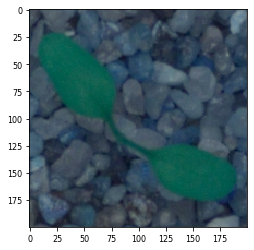

In [383]:
plt.imshow(images[791])

In [384]:
features_of_img

array([[0.39079307, 0.38990902, 0.08333333, ..., 0.51103215, 0.27581466,
        0.37537758],
       [0.05974475, 0.0341203 , 0.16666667, ..., 0.48020997, 0.47281624,
        0.40928918],
       [0.37773319, 0.3768302 , 0.08333333, ..., 0.30943331, 0.25070967,
        0.36164991],
       ...,
       [0.27646807, 0.27541813, 0.08333333, ..., 0.36168775, 0.27569785,
        0.6219286 ],
       [0.46532538, 0.4645495 , 0.08333333, ..., 0.51004105, 0.40314772,
        0.29117944],
       [0.25038548, 0.24929769, 0.08333333, ..., 0.51009682, 0.47439198,
        0.27868997]])

In [385]:
submission_df

,file,species
0,1b490196c.png,6
1,85431c075.png,10
2,506347cfe.png,2
3,7f46a71db.png,0
4,668c1007c.png,3
...,...,...
789,456d507c0.png,9
790,78b1bf91a.png,0
791,8cf2e3e6c.png,8
792,948cdb277.png,9


In [386]:
submission_df.to_csv("data/submission_3_10_19.csv")

In [387]:
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }

In [388]:
mapping_rev = {v : k for k, v in mapping.items()}

In [389]:
mapping_rev

{0: 'Sugar beet',
 1: 'Fat Hen',
 2: 'Scentless Mayweed',
 3: 'Charlock',
 4: 'Small-flowered Cranesbill',
 5: 'Maize',
 6: 'Shepherds Purse',
 7: 'Common wheat',
 8: 'Common Chickweed',
 9: 'Cleavers',
 10: 'Loose Silky-bent',
 11: 'Black-grass'}

In [390]:
submission_df.species.replace(mapping_rev, inplace=True); submission_df

,file,species
0,1b490196c.png,Shepherds Purse
1,85431c075.png,Loose Silky-bent
2,506347cfe.png,Scentless Mayweed
3,7f46a71db.png,Sugar beet
4,668c1007c.png,Charlock
...,...,...
789,456d507c0.png,Cleavers
790,78b1bf91a.png,Sugar beet
791,8cf2e3e6c.png,Common Chickweed
792,948cdb277.png,Cleavers


In [391]:
submission_df.to_csv("/Users/anacriel/Desktop/submission.csv", index=False)